## Introduction: ##
This project will analyze various datasets about Pittsburgh neighborhoods to determine which one is the best! Based on the datasets available on WPRDC, we decided the best course of action would be for each group member to pick a submetric they found important for determining the best neighborhood and then configure our metrics altogether.

## Our Metric: ## 
The three datasets we chose to analyze pertained to the median age at death, fast food establishments, and air quality. We made a holistic decision based on our findings from each dataset to determine the best 
neighborhood in Pittsburgh.

---
## Data Set 1: Allegheny County Fast Food Establishments ## 

data set : https://data.wprdc.org/dataset/allegheny-county-fast-food

The dataset keeps track of all the fast food restaurants without an alcohol permit within Allegheny County. This includes chain restaurants, as well as locally owned restaurants. It was last updated in 2016, and contains over 800 entries.

The following code imports the libraries necessary for working with the dataset, and displaying visualizations. It also reads in the dataset and displays the first few rows to display the formatting.

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://data.wprdc.org/dataset/c34f9a82-779c-4f90-9e1c-b3b5025b0db5/resource/3c530161-2976-41ae-a0f0-7d3e74835049/download/fastfoodalleghenycountyupdatexy2.csv"
fast_food_data = pd.read_csv(url)

# Display the first few rows of the dataset to understand the format
fast_food_data.head()

,Name,Legal Name,Start Date,Street Number,Street Name,ZIP Code,Lat,Lon,Category
0,Adrian's Pizza,NaN,11/7/2014,605,Thompson Run Rd,15237,40.539465,-79.990764,Take Out
1,Adrian's Pizza Express,Rock Enterprises Inc,4/22/2004,7824,Perry Hwy,15237,40.551219,-80.037362,Take Out
2,Allegheny Sandwich Shop,NaN,2/24/1997,414,Grant St,15219,40.438110,-79.996860,NO Dollar Menu
3,Allegheny Sandwich Shoppe #3,Allegheny Sandwich Shoppe Inc,11/9/2001,440,Ross St,15219,40.438514,-79.995330,NO Dollar Menu
4,Amili's Pizzeria,NaN,2/26/1999,1021,Brownsville Rd,15210,40.406082,-79.991863,Take Out


The sub-metric I chose based on this dataset is the total count of fast food restuarants for each given neighborhood. I chose this metric for the following reasons.

1. **Accessibility and Convenience**: A high number of fast food restaurants can indicate good accessibility to different food options within the neighborhood. This can be particularly important for individuals who rely on convenience (college students) or have limited mobility.
2. **Overall Economic Activity**: A high concentration of fast food restaurants likely represent a thriving local economy and a high number of potential job opportunities in the area.
3. **Rising Urban Development**: An increase in fast food restaurants could be a sign of ongoing urban development, which might attract investment and lead to improvements in infrastructure and amenities.
4. **Cultural Diversity**: Provides a reflection of the cultural diversity of the neighborhood; a higher count of fast food restaurants could indicate a culturally diverse community.

The following code calculates the total number of fast food restaurants for each given zip code, sorts the zip codes based on the total number of restaurants in descending order, converts them to their corresponding neighborhoods, and finally visualizes them in a table along with a bar graph.

                      Neighborhood  Total Fast Food Restaurants
209                    Monroeville                           51
697       Downtown, Strip District                           46
689                       McKnight                           44
523                        Oakland                           38
644              Robinson, Crafton                           36
163  Station Square, Hill District                           27
623                 Pleasant Hills                           25
343                     Penn Hills                           22
194                    Bethel Park                           21
830                  Squirrel Hill                           20


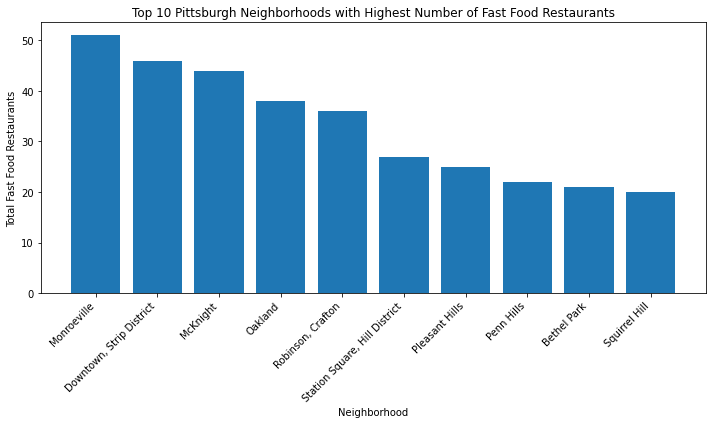

In [5]:
# Calculate the total number of fast food restaurants in each ZIP code
fast_food_data['total_fast_food'] = fast_food_data.groupby('ZIP Code')['Category'].transform('count')

# Sort ZIP codes by the total number of fast food restaurants
sorted_data = fast_food_data.sort_values(by='total_fast_food', ascending=False)
top_zipcodes = sorted_data[['ZIP Code', 'total_fast_food']].drop_duplicates().head(10)

neighborhoods = [
    'Monroeville', 
    'Downtown, Strip District', 
    'McKnight', 
    'Oakland', 
    'Robinson, Crafton', 
    'Station Square, Hill District', 
    'Pleasant Hills', 
    'Penn Hills', 
    'Bethel Park', 
    'Squirrel Hill'
]

# Create a DataFrame for the top neighborhoods with the highest number of fast food restaurants
top_neighborhoods = pd.DataFrame({
    'Neighborhood': neighborhoods,
    'Total Fast Food Restaurants': top_zipcodes['total_fast_food']
})

# Display the top neighborhoods with the highest number of fast food restaurants
print(top_neighborhoods)

# Visualize the top neighborhoods with the highest number of fast food restaurants
plt.figure(figsize=(10, 6))
plt.bar(top_neighborhoods['Neighborhood'], top_neighborhoods['Total Fast Food Restaurants'])
plt.xlabel('Neighborhood')
plt.ylabel('Total Fast Food Restaurants')
plt.title('Top 10 Pittsburgh Neighborhoods with Highest Number of Fast Food Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The results displayed in the visualizations represent the top 10 Pittsburgh neighborhoods with the highest number of fast food restaurants. This information can be valuable for potential residents, business owners, and policymakers interested in understanding food options and economic dynamics within the given neighborhoods. Overall, the results suggest that *most* areas with a high number of fast food restaurants have a higher population density, and more commercial activity. 

To conclude, according to the sub-metric of total fast food restaurants, the best neighborhood in Pittsburgh is Monroeville, with Downtown/Strip District and McKnight following close behind. 

---
Data Set 2 will analyze the median age at death for each neighborhood in Pittsburgh. This metric gives a better rank to neighborhoods that have a higher median age at death.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the data set into a pandas dataframe.

In [2]:
url = "https://data.wprdc.org/dataset/ee735209-4de7-4ea4-b446-bf0f0f6d9cb3/resource/c2e1500a-a12a-4e91-be94-76c6a892b7e2/download/nhoodmedianage20112015.csv"
death_data_df = pd.read_csv(url)

Print out the head of the df to see how our df is formatted.

In [3]:
death_data_df.head()

,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5


Since a lot of the rows in the TOTAL MD AGE AT DEATH column contain Nan, lets drop those rows.

In [4]:
death_data_df.dropna(subset=['TOTAL MD AGE AT DEATH'], inplace=True)

Lets plot the metric we care about which is th TOTAL MD AGE AT DEATH for each NEIGHBORHOOD.

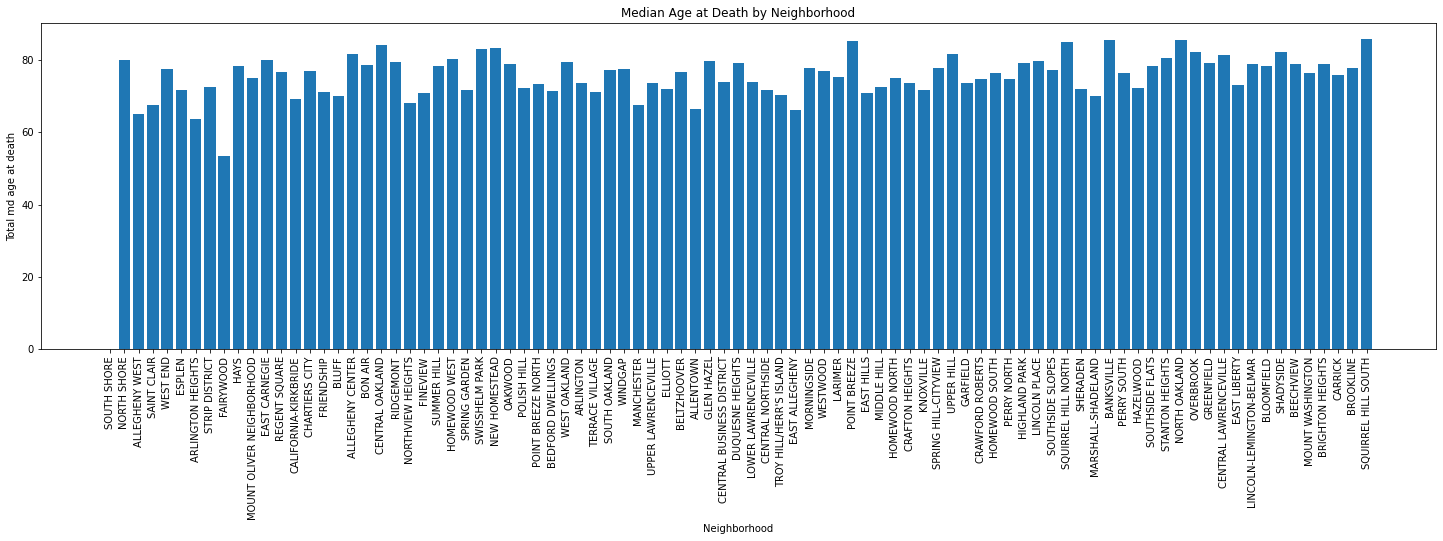

In [5]:
plt.figure(figsize=(25, 6))
plt.bar(death_data_df['NEIGHBORHOOD'], death_data_df['TOTAL MD AGE AT DEATH'])
plt.xlabel('Neighborhood')
plt.ylabel('Total md age at death')
plt.title('Median Age at Death by Neighborhood')
plt.xticks(rotation=90)
plt.show()

Lets rank the neighborhoods from highest TOTAL MD AGE AT DEATH to the lowest.

In [6]:
ranked_neighborhood_df = death_data_df[['NEIGHBORHOOD', 'TOTAL MD AGE AT DEATH']].copy()
ranked_neighborhood_df['RANK'] = ranked_neighborhood_df['TOTAL MD AGE AT DEATH'].rank(ascending=False)
ranked_neighborhood_df = ranked_neighborhood_df.sort_values(by='RANK')
ranked_neighborhood_df.reset_index(drop=True, inplace=True)
print(ranked_neighborhood_df)

           NEIGHBORHOOD  TOTAL MD AGE AT DEATH  RANK
0   SQUIRREL HILL SOUTH                   85.9   1.0
1         NORTH OAKLAND                   85.6   2.0
2            BANKSVILLE                   85.5   3.0
3          POINT BREEZE                   85.1   4.0
4   SQUIRREL HILL NORTH                   85.0   5.0
..                  ...                    ...   ...
84       EAST ALLEGHENY                   66.2  85.0
85       ALLEGHENY WEST                   65.0  86.0
86    ARLINGTON HEIGHTS                   63.7  87.0
87            FAIRYWOOD                   53.3  88.0
88          SOUTH SHORE                    0.0  89.0

[89 rows x 3 columns]


Thats it! The ranked_neighborhood_df now contains all of the neighborhoods in Pittsburgh along with their respective rank.

---

Dataset 3 will analyze average pollution across several locations around Pittsburgh to determine their relative air qualities. This metric better describes "worstness" than it does "bestness," so each location will receive a detriment to their scores calculated from the first two datasets.

The Air Quality data was filtered from the WPRDC website and downloaded as a CSV file, so that will be the dataset we work with.

In [2]:
data = pd.read_csv("Pollutants.csv",index_col = "datetime_est", parse_dates = True)
data

,_id,site,parameter,is_valid,report_value,unit,unit_description,highest_flag,aqs_parameter_category
datetime_est,,,,,,,,,
2021-10-07 15:00:00,5293192,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 11:00:00,5316958,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-07 14:00:00,5293169,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-15 15:00:00,5314718,Avalon,SO2,t,0.035,PPM,Parts Per Million,NaN,Criteria Pollutants
2021-10-16 10:00:00,5316891,Avalon,SO2,t,0.037,PPM,Parts Per Million,NaN,Criteria Pollutants
...,...,...,...,...,...,...,...,...,...
2023-11-24 23:00:00,7936589,North Braddock,SO2,t,0.000,PPM,Parts Per Million,NaN,Criteria Pollutants
2023-06-16 12:00:00,7310018,North Braddock,H2S,t,0.000,PPM,Parts Per Million,NaN,NaN
2022-11-19 20:00:00,6372113,North Braddock,H2S,t,0.000,PPM,Parts Per Million,NaN,NaN


Since there is so much variation both in kinds of pollutants captured and when they were captured in each location, the best plan here is to take a long time average over all the data we have. Each site will have lots of data to average, so we will first filter by site.

In [3]:
mask = data["site"] == "Avalon"
masked = data[mask]

Then we have to get rid of any negative measurements that will mess with the averages. We can't have negative pollution, after all!

In [4]:
negmask = masked["report_value"] >= 0.0
nonegs = masked[negmask]

Now we'll need to split it up by pollutants to average them separately. Let's start with SO2.

In [5]:
mask2 = nonegs["parameter"] == "SO2"
masked2 = nonegs[mask2]

We can take the average of the report values and start compiling a dataframe pollutant-by-pollutant and site-by-site.

In [6]:
average = masked2["report_value"].mean()
frame = pd.Series({"parameter":"SO2","Avalon":average})
frame

parameter         SO2
Avalon       0.001781
dtype: object

Let's repeat this process for each site and each pollutant within each site, then compile it all into one dataframe.

In [7]:
arr = []
for site in data["site"].unique():
    mask = data["site"] == site
    masked = data[mask]
    negmask = masked["report_value"] >= 0.0
    nonegs = masked[negmask]
    arr2 = []
    arr3 = []
    for poll in nonegs["parameter"].unique():
        mask2 = nonegs["parameter"] == poll
        masked2 = nonegs[mask2]
        arr2.append(masked2["report_value"].mean())
        arr3.append(poll)
    frame = pd.DataFrame({"parameter": arr3, site : arr2})
    frame = frame.transpose()
    frame.columns = frame.loc["parameter"]
    frame.columns.name = ''
    frame = frame.drop(labels = "parameter", axis = 0)
    arr.append(frame)
plsgraph = pd.concat(arr)
plsgraph

,SO2,H2S_SO2,H2S,SO2PPM,OZONE,NO,NO2,NOX,OZONE2,OZONE_B
Avalon,0.001781,0.000498,0.000114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Clairton,0.001408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Court House,NaN,NaN,NaN,0.00269,NaN,NaN,NaN,NaN,NaN,NaN
Harrison Township,NaN,NaN,NaN,NaN,0.026216,0.001528,0.005831,0.007789,0.028511,0.023206
Lawrenceville,NaN,NaN,NaN,NaN,0.025524,NaN,NaN,NaN,0.02518,NaN
Liberty,0.003257,0.005839,0.002324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
North Braddock,0.001452,0.003143,0.001443,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Uh oh, that's a lot of NaN's. We can still graph what we have, but we'll need a better way of scoring each location, since they don't all have the same kinds of pollution.

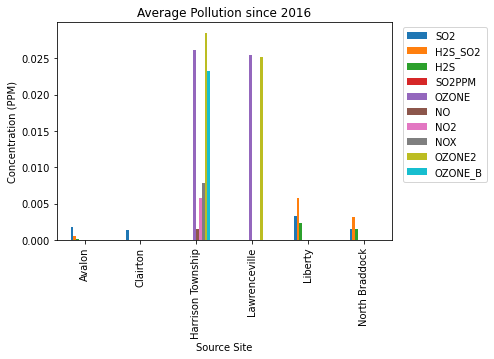

In [8]:
plsgraph = plsgraph.drop(labels = "Court House", axis = 0)
plsgraph.plot(kind = "bar", title = "Average Pollution since 2016", ylabel = "Concentration (PPM)", xlabel = "Source Site")
plt.legend(bbox_to_anchor=(1.3,1))

Honestly, that's not too bad considering all the NaN's. It seems like Harrison Township and Lawrenceville have the most pollution based on this graph, but we aren't taking into account the safety levels of each pollutant. We should be weighting the scores based on how bad each pollutant is to have in the air.

Based on OSHA and NIOSH recommendations, I listed out the different safety levels for each pollutant and a corresponding multiplier to get each value to 100.

|Pollutant|Safe limit (PPM)|Multiplier|
|---------|----------|----------|
|SO2|5|20|
|H2S|20|5|
|NO|25|4|
|Ozone|0.1|1000|
|NOX|1|100|

Since the multiplier for Ozone is so high, any location that has a lot of Ozone will have a pretty high weighted score, but places with more H2S won't have as high a score because it isn't as toxic to breathe.

So let's make a dictionary with the multipliers for all the different measurements based on the table above. In the case of H2S_SO2, which measures both at the same time, we will go with the SO2 multiplier, since it is worse to have in the air. Then, we can use it to generate a weighted score for each site, excluding the NaN's

In [9]:
scores = {}
multipliers = {"SO2":20, "H2S":5, "H2S_SO2":20, "SO2PPM":20, "NO":4, "OZONE":1000, "NO2":100, "NOX":100, "OZONE2":1000, "OZONE_B":1000}
for index, row in plsgraph.iterrows():
    total = 0
    scorable = row.dropna()
    for kind in scorable.index:
        total = total + (scorable[kind] * multipliers[kind])
    scores[index] = total
scores = pd.Series(scores)
scores

Avalon                0.046141
Clairton              0.028160
Harrison Township    79.301553
Lawrenceville        50.703754
Liberty               0.193543
North Braddock        0.099114
dtype: float64

And let's make sure to graph it for good measure.

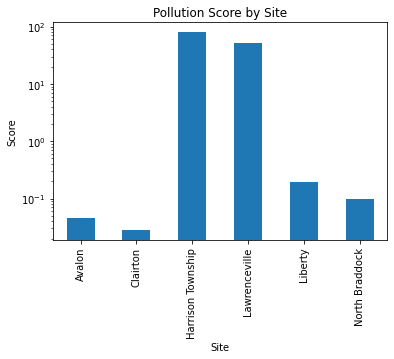

In [12]:
scores.plot(kind="bar",logy = True,ylabel= "Score", xlabel= "Site", title="Pollution Score by Site")

### Conclusion
Based on the score values shown in the graph, historically, Harrison Township and Lawrenceville have the worst air quality out of the locations surveyed. As stated at the start, this submetric will act as a detriment to the submetrics calculated from the other two datasets. However, the top contenders from the other two datasets don't have any pollution data, so there is nothing to detract at the moment.

Now that we have analyzed all three datasets we can combine our rankings for each individual metric to determine which neighborhood is best overall with our combined metric

Based on our combined metric the best neighborood overall is: 

Conclusions:

Brian's Conclusion: 